# HEALPix coordinate and plot examples

## Setup

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from astropy.visualization.wcsaxes import WCSAxes
from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import healpy as hp
from scipy.ndimage import gaussian_filter 

In [3]:
# Get an example image
hdu_list = fits.open('https://github.com/gammapy/gammapy-extra/blob/master/datasets/catalogs/fermi/gll_psch_v08.fit.gz?raw=true')
# hdu_list.info()
wcs = WCS(hdu_list[0].header)
data = np.sqrt(gaussian_filter(hdu_list[0].data.astype('float'), 5))

## Plot image and draw markers at given positions

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


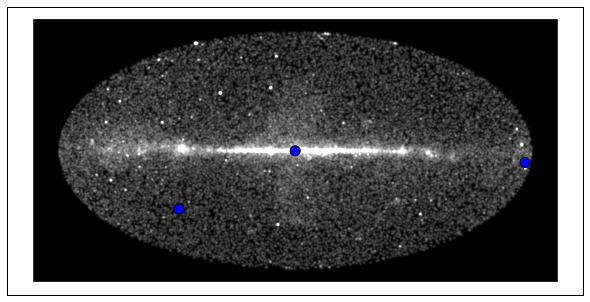

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

# Plot marker for Crab Nebula in RADEC coordinates
c = SkyCoord(083.63308, +22.01450, frame='icrs', unit='deg')
plt.scatter(c.data.lon.deg, c.data.lat.deg, s=100, transform=ax.get_transform('icrs'))

# Plot marker for Galactic center in GALACTIC coordinates
c = SkyCoord(0, 0, frame='galactic', unit='deg')
plt.scatter(c.data.lon.deg, c.data.lat.deg, s=100, transform=ax.get_transform('galactic'))

# Of course, we can also draw markers at given pixel positions
plt.scatter(1000, 500, s=100)

# We could use the `wcs` object to transform pixel to Galactic sky coordinates
# or the other way back.

## Compute and plot markers at HEALPix pixel centers

We will use the following healpy functions:

* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.order2nside.html
* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.pix2ang.html

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


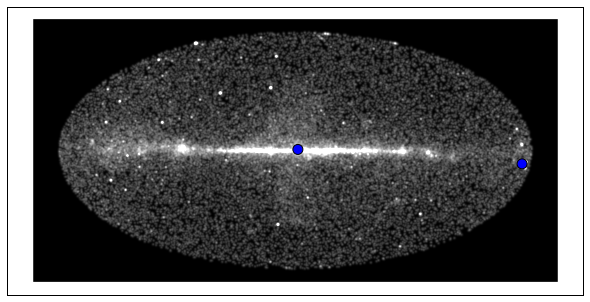

In [6]:
import healpy
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

# For the Crab Nebula, HiPS has order 3 and ipix = 377
nside = healpy.order2nside(order=3)
ra, dec = healpy.pix2ang(nside=nside, ipix=377, nest=True, lonlat=True)
plt.scatter(ra, dec, s=100, transform=ax.get_transform('icrs'))

# For the galactic center, HiPS has order 3 and ipix = 450
nside = healpy.order2nside(order=3)
ra, dec = healpy.pix2ang(nside=nside, ipix=450, nest=True, lonlat=True)
plt.scatter(ra, dec, s=100, transform=ax.get_transform('icrs'))

## Compute and plot markers at HEALPix pixel corners

We will use the following healpy functions:

* http://healpy.readthedocs.io/en/latest/generated/healpy.boundaries.html
* http://healpy.readthedocs.io/en/latest/generated/healpy.pixelfunc.vec2ang.html

In [68]:
# First let's do the computation and print out coordinates
# to understand how healpy works
nside = healpy.order2nside(order=3)
coords = healpy.boundaries(nside=nside, pix=450, nest=True)
theta, phi = healpy.vec2ang(coords, lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')
print(radec)
print(radec.galactic)

<SkyCoord (ICRS): (ra, dec) in deg
    [( 242.19350089, -22.6263803 ), ( 270.        , -43.1943471 ),
     ( 226.97382512, -19.37793463), ( 229.39870535, -33.05573115)]>
<SkyCoord (Galactic): (l, b) in deg
    [( 351.55907245,  21.09375872), ( 349.06587812,  -9.65439747),
     ( 342.01462541,  32.94289257), ( 335.12864085,  20.5241756 )]>


[ 242.19350089  270.          226.97382512  229.39870535]
[-22.6263803  -43.1943471  -19.37793463 -33.05573115]


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


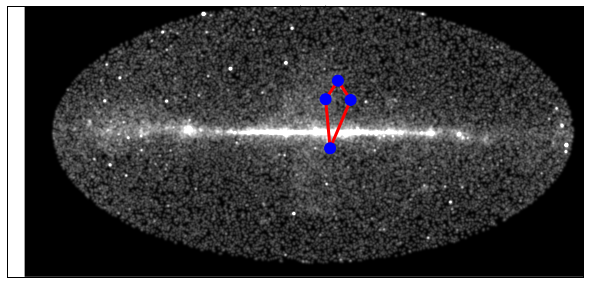

In [126]:
# Let's plot the image again, and this time markers at the
# HEALPix pixel corners
fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)
lon = radec.data.lon.deg
lat = radec.data.lat.deg

print(radec.data.lon.deg)
print(radec.data.lat.deg)

ax.plot([lon[0], lon[1]], [lat[0], lat[1]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)
ax.plot([lon[2], lon[3]], [lat[2], lat[3]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)

ax.scatter([lon[0], lon[2]], [lat[0], lat[2]], s=120, transform=ax.get_transform('icrs'), color='blue', zorder=2)

ax.plot([lon[1], lon[3]], [lat[1], lat[3]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)
ax.plot([lon[0], lon[2]], [lat[0], lat[2]], 'r', lw=3, transform=ax.get_transform('icrs'), zorder=1)

ax.scatter([lon[1], lon[3]], [lat[1], lat[3]], s=120, transform=ax.get_transform('icrs'), color='blue', zorder=2)

ax.set_xlim(-110.5, data.shape[1] - 110.5)
ax.set_ylim(-0.5, data.shape[0] - 110.5)
ax.imshow(data, cmap='gray', vmax=0.4, origin='lower')

In [16]:
# This looks weird.
# But it might be correct?
# Note that we have HEALPix pixels in RADEC coordinates,
# drawn on a GALACTIC sky image.

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


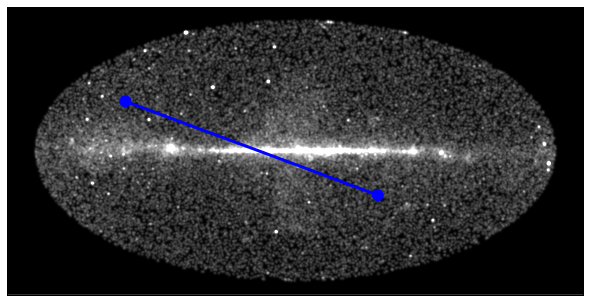

In [66]:
# Adeel: please draw lines connecting the corners,
# and also draw markers for the poles (i.e. declination +90 and -90 in RADEC coordinates)
# And then start drawing more HEALPix pixels (or all of them)

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.plot([0, 0], [90, -90], lw=3, transform=ax.get_transform('icrs'), color='blue')
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')

# Also try other HEALPix orders, e.g. change to order 2 or 4.

# Let me know if you have any questions / issues.

<SkyCoord (ICRS): (ra, dec) in deg
    [( 225.07178956, -38.8422047 ), ( 135.20711171,  38.11959324),
     (  41.91879175,  47.83759249), (  43.51013176,  35.95159864)]>
<SkyCoord (Galactic): (l, b) in deg
    [( 328.73674485,  17.48828593), ( 184.65991605,  41.00410431),
     ( 142.30415539, -10.61412673), ( 149.09494059, -20.61547315)]>


/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':
/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


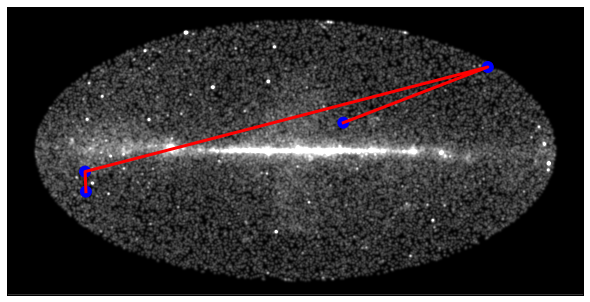

In [63]:
# Using order = 4
nside = healpy.order2nside(order=4)
coords = healpy.boundaries(nside=nside, pix=450, nest=True)
theta, phi = healpy.vec2ang(coords, lonlat=False)
radec = SkyCoord(ra=phi, dec=np.pi/2 - theta, unit='radian', frame='icrs')

fig = plt.figure(figsize=(8, 6))
ax = WCSAxes(fig, [1, 1, 1, 1], wcs=wcs)
fig.add_axes(ax)

plt.plot(radec.data.lon.deg, radec.data.lat.deg, 'r', lw=3, transform=ax.get_transform('icrs'))
plt.scatter(radec.data.lon.deg, radec.data.lat.deg, s=120, transform=ax.get_transform('icrs'), color='blue')
plt.imshow(data, cmap='gray', vmax=0.4, origin='lower')